Chapter 1.  Programming Challenge 1 page 22, Even-Odd Vending Machine.


In [1]:
def EvenOdd(num):
    print ('*** Please enter an integer number ***')
    if num % 2 == 0:
        print("even")
    else:
        print("odd")
    for i in range(0, 20, 2):
        print(num + i)


if __name__ == '__main__':
    EvenOdd(22)
    EvenOdd(11)


*** Please enter an integer number ***
even
22
24
26
28
30
32
34
36
38
40
*** Please enter an integer number ***
odd
11
13
15
17
19
21
23
25
27
29


Chapter 2.  Programming Challenge 2 page 55, Exploring a Quadratic Function Visually

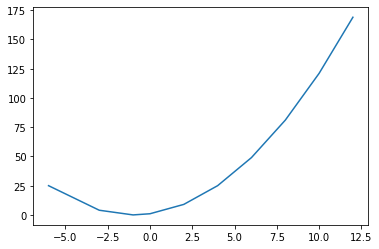

In [10]:
#Matplotlib: Had to re-study :(

import matplotlib.pyplot as plt

def drawing(x,y):
  plt.plot(x,y)
  plt.show()


if __name__ == '__main__':
  x_values = [-6,-3,-1,0,2,4,6,8,10,12]
  y_values = []
  for x in x_values:
    y = x**2 + 2*x + 1
    y_values.append(y)
  drawing(x_values,y_values)

Chapter 3.  Programming Challenge 2 page 89, Statistics Calculator

In [14]:
# Will need to re study and practice Python again.
# Most functions are from the textbook.
# 'FileNotFoundError' because there is no actual 'mydata.txt' file.
# format() method:Still making mistakes on using format method. 

from collections import Counter

def read_data(filename):
    numbers = []
    with open(filename) as f:
        for line in f:
            numbers.append(float(line))

    return numbers

def calculate_mean(numbers):
    s = sum(numbers)
    N = len(numbers)
    mean = s / N

    return mean

def calculate_median(numbers):

    N = len(numbers)
    numbers.sort()

    # Fine the median
    if N % 2 == 0:
        # if N is even, convert to int and match position
        m1 = int(N / 2) - 1
        m2 = int((N / 2) + 1) - 1
        median = (numbers[m1] + numbers[m2]) / 2
    else:
        # Convert to integer, match position
        m = int((N + 1) / 2) - 1
        median = numbers[m]

    return median

def calculate_mode(numbers):
    c = Counter(numbers)
    numbers_freq = c.most_common()

    max_count = numbers_freq[0][1]

    modes = []
    for num in numbers_freq:
        if num[1] == max_count:
            modes.append(num[0])

    return modes

def find_differences(numbers):
    # Find the mean
    mean = calculate_mean(numbers)
    # Find the differences from the mean
    diff = []
    for num in numbers:
        diff.append(num - mean)

    return diff


def calculate_variance(numbers):
    # Find the list of differences
    diff = find_differences(numbers)
    # Find the squared differences
    squared_diff = []

    for d in diff:
        squared_diff.append(d**2)
    # Find the variance
    sum_squared_diff = sum(squared_diff)

    variance = sum_squared_diff / len(numbers)

    return variance

if __name__ == '__main__':
    data = read_data('mydata.txt')
    mean = calculate_mean(data)
    median = calculate_median(data)
    mode = calculate_mode(data)
    variance = calculate_variance(data)
    stan_dev = variance**0.5
    print('Mean: {0}, Median {1}, Mode {2}'.format(mean, median, mode))
    print('Variance: {0}, Standard Deviation: {1}'.format(variance, stan_dev))

FileNotFoundError: ignored

Chapter 4.  Programming Challenge 4 page 117, Solving Single-Variable Inequalities

In [ ]:
# Need to study SymPy, SymPy Fucntions (inequality, polynomial, rational, etc)
# For this challenge, create a function, isolve(), that will take
# any inequality, solve it, and then return the solution.
# https://docs.sympy.org/latest/modules/solvers/inequalities.html

from sympy import Poly, Symbol, solve
from sympy import solve_poly_inequality, solve_rational_inequalities, solve_univariate_inequality

def isolve(inequality):
  x = Symbol('x')    # x on the left is <python label, refers to symbol x> 

  expr = inequal_obj.lhs  #(p.117)lhs attribute: to extract the left side of inequality.
  rel  = inequal_obj.rel_op #(p.117)rel attribute: extract relational operator from inequality object.

# check which inequality-solving functions is the right one to use
  if expr.is_polynomial():    #p.119
    p = Poly(expr, x)         #p.117 create Poly object
    return solve_poly_inequality (p, rel)

  elif expr.is_rational_function():   #p.119
    numer, denom = expr.as_numer_denom()
    p1 = Poly(numer)
    p2 = Poly(denom)
    return solve_rational_inequalities ([[((p1, p2), rel)]]) #p.118

  else:
    return solve_univariate_inequality (inequal_obj, x , relational = False)


if __name__ == '__main__':
  inequal = input ('Please enter inequality to solve: ')
  inequal_obj = sympify(inequal) 
  print(isolve(inequal_obj))


Chapter 5.  Programming Challenge 2 page 143, Law of Large Numbers

In [3]:
#Note:Somehow this one confused me. (the challenge)
#This is merely a work based on the Author's solution.
#(CHALLENGE)
# According to the law of large numbers, the average value of results over
# multiple trials approaches the expected value as the number of trials
# increases. Your challenge in this task is to verify this law when rolling a
# six-sided die for the following number of trials: 100, 1000, 10000, 100000,
# and 500000.


import random

def dice(rolls):
    sum = 0
    for r in range(rolls):
        sum += random.randint(1, 6)
    return sum / rolls


if __name__ == '__main__':
    trials = [100, 1000, 10000, 100000, 500000]
    print('Expected value is: 3.5')
    for trial in trials:
        avg = dice(trial)
        print('Trials: {0} Trial average {1}'.format(trial, avg))

Expected value is: 3.5
Trials: 100 Trial average 3.25
Trials: 1000 Trial average 3.463
Trials: 10000 Trial average 3.5135
Trials: 100000 Trial average 3.50006
Trials: 500000 Trial average 3.502126


Chapter 7.  Programming Challenge 2 page 205, Implement the Gradient Descent

In [13]:
# Will need to study on Math part_all these terms and equations (gradient ascent, continuity, quadratic function,etc.) are a blur now.
# Gradient descent method: used to find minimum value of function.
# use gradient descent algorithm to find minimum value of single-variable function specified as input by user.
# Ref: figure 7-5 on p.193.
# Text: p.191
# code: Author's 'Gradient Ascent' code from p.195


from sympy import Derivative, Symbol, sympify
from sympy.core.sympify import SympifyError

#same code from p.195
def gradient_descent(x0, f1x, x):
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old - step_size * f1x.subs({x: x_old}).evalf()
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old - step_size * f1x.subs({x: x_old}).evalf()

    return x_new

#same code from p.195
if __name__ == '__main__':
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('This is an invalid function')
    else:

        var = Symbol(var)
        d = Derivative(f, var).doit()
        var_min = gradient_descent(var0, d, var)  # Google: different between gradient ascent and descent (click: stackoverflow)
        print('{0}: {1}'.format(var.name, var_min))
        print('Minimum value: {0}'.format(f.subs({var: var_min})))

Enter a function in one variable: 3*x**2+2*x
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: 0.1
x: -0.331668643986980
Minimum value: -0.333325019761474
